In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/parking_lot_dataset.csv',encoding='unicode_escape')
df.shape

(1000, 9)

In [4]:
df.head()

,record_id,parking_lot_id,slot_id,vehicle_type,entry_time,exit_time,duration_minutes,is_occupied,parking_fee
0,1,LOT_B,S8,Car,2025-01-19 01:04:00,2025-01-19 02:36:00,92,1,164.76
1,2,LOT_C,S18,Car,2025-01-21 23:18:00,2025-01-22 02:01:00,163,1,291.46
2,3,LOT_C,S89,Electric,2025-01-08 10:33:00,2025-01-08 12:12:00,99,0,0.00
3,4,LOT_A,S84,SUV,2025-01-10 07:22:00,2025-01-10 11:12:00,230,1,320.99
4,5,LOT_A,S85,Car,2025-01-04 10:17:00,2025-01-04 12:34:00,137,0,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_id         1000 non-null   int64  
 1   parking_lot_id    1000 non-null   object 
 2   slot_id           1000 non-null   object 
 3   vehicle_type      1000 non-null   object 
 4   entry_time        1000 non-null   object 
 5   exit_time         1000 non-null   object 
 6   duration_minutes  1000 non-null   int64  
 7   is_occupied       1000 non-null   int64  
 8   parking_fee       1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
pd.isnull(df).sum()

,0
record_id,0
parking_lot_id,0
slot_id,0
vehicle_type,0
entry_time,0
exit_time,0
duration_minutes,0
is_occupied,0
parking_fee,0


In [8]:
df.dropna(inplace=True)

In [9]:
df['parking_fee']=df['parking_fee'].astype('int')

In [10]:
df['parking_fee'].dtypes

dtype('int64')

In [11]:
df.columns

Index(['record_id', 'parking_lot_id', 'slot_id', 'vehicle_type', 'entry_time',
       'exit_time', 'duration_minutes', 'is_occupied', 'parking_fee'],
      dtype='object')

In [12]:
df.rename(columns={'is_occupied':'occupied'})

,record_id,parking_lot_id,slot_id,vehicle_type,entry_time,exit_time,duration_minutes,occupied,parking_fee
0,1,LOT_B,S8,Car,2025-01-19 01:04:00,2025-01-19 02:36:00,92,1,164
1,2,LOT_C,S18,Car,2025-01-21 23:18:00,2025-01-22 02:01:00,163,1,291
2,3,LOT_C,S89,Electric,2025-01-08 10:33:00,2025-01-08 12:12:00,99,0,0
3,4,LOT_A,S84,SUV,2025-01-10 07:22:00,2025-01-10 11:12:00,230,1,320
4,5,LOT_A,S85,Car,2025-01-04 10:17:00,2025-01-04 12:34:00,137,0,0
...,...,...,...,...,...,...,...,...,...
995,996,LOT_B,S115,Bike,2025-01-08 22:24:00,2025-01-08 23:15:00,51,1,87
996,997,LOT_C,S56,Electric,2025-01-21 00:26:00,2025-01-21 02:00:00,94,0,0
997,998,LOT_B,S107,Car,2025-01-09 17:51:00,2025-01-09 18:25:00,34,1,63
998,999,LOT_B,S17,Bike,2025-01-04 00:45:00,2025-01-04 02:49:00,124,0,0


In [13]:
df.describe()

,record_id,duration_minutes,is_occupied,parking_fee
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,124.387000,0.516000,80.127000
std,288.819436,64.379624,0.499994,105.751209
min,1.000000,15.000000,0.000000,0.000000
25%,250.750000,70.000000,0.000000,0.000000
50%,500.500000,124.000000,1.000000,19.000000
75%,750.250000,179.000000,1.000000,140.250000
max,1000.000000,240.000000,1.000000,446.000000


In [14]:
df[['duration_minutes',	'is_occupied']].describe()

,duration_minutes,is_occupied
count,1000.000000,1000.000000
mean,124.387000,0.516000
std,64.379624,0.499994
min,15.000000,0.000000
25%,70.000000,0.000000
50%,124.000000,1.000000
75%,179.000000,1.000000
max,240.000000,1.000000


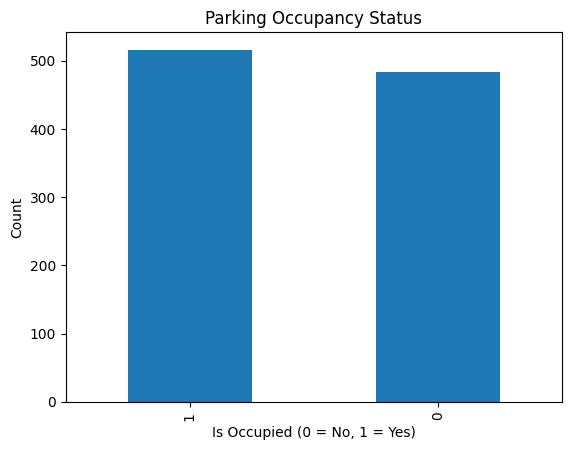

In [15]:
plt.figure()
df['is_occupied'].value_counts().plot(kind='bar')
plt.xlabel("Is Occupied (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Parking Occupancy Status")
plt.show()

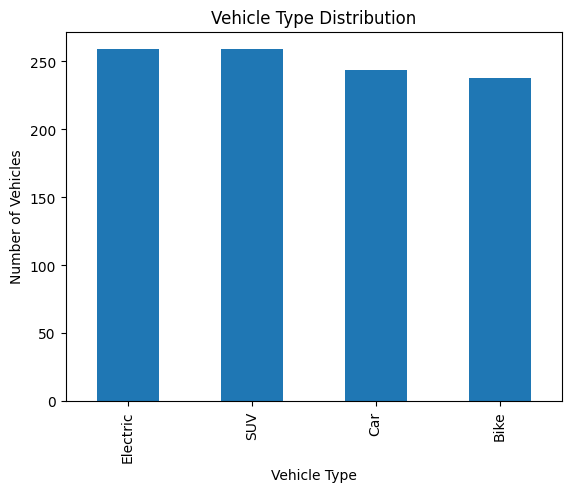

In [16]:
plt.figure()
df['vehicle_type'].value_counts().plot(kind='bar')
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Vehicles")
plt.title("Vehicle Type Distribution")
plt.show()

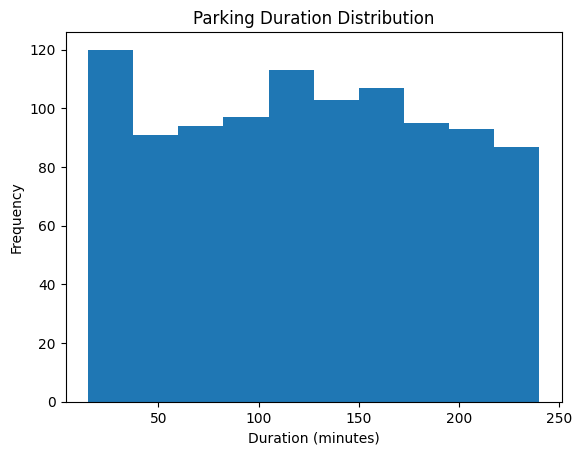

In [17]:
plt.figure()
plt.hist(df['duration_minutes'])
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Parking Duration Distribution")
plt.show()

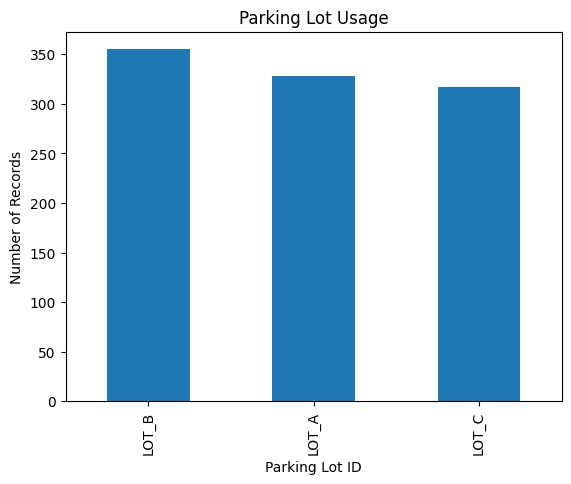

In [19]:
plt.figure()
df['parking_lot_id'].value_counts().plot(kind='bar')
plt.xlabel("Parking Lot ID")
plt.ylabel("Number of Records")
plt.title("Parking Lot Usage")
plt.show()